In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

15

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/45".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/45
number of class1:1136
number of class2:481

 ****** Running generation 0 ****** 

Population's average fitness: 0.46782 stdev: 0.14761
Best fitness: 0.73408 - size: (2, 13) - species 2 - id 62
Average adjusted fitness: 0.232
Mean genetic distance 2.904, standard deviation 0.504
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 5.203 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56270 stdev: 0.14071
Best fitness: 0.75696 - size: (3, 15) - species 1 - id 316
Average adjusted fitness: 0.294
Mean genetic distance 3.022, standard deviation 0.511
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.802 sec (5.502 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60234 stdev: 0.12823
Best fitness: 0.75696 - size: (3, 15) - species 1 - id 316
Average adjusted fitness: 0.302
Mean genetic distance 3.097, standard deviation 0.537
Population of 202 members in 33 species
To

Population's average fitness: 0.66925 stdev: 0.11365
Best fitness: 0.81818 - size: (6, 22) - species 22 - id 1947
Average adjusted fitness: 0.378
Mean genetic distance 3.336, standard deviation 0.522
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 10.428 sec (9.990 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67260 stdev: 0.11803
Best fitness: 0.81818 - size: (6, 22) - species 22 - id 1947
Average adjusted fitness: 0.374
Mean genetic distance 3.361, standard deviation 0.521
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 10.190 sec (10.027 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66508 stdev: 0.11928
Best fitness: 0.81818 - size: (6, 22) - species 22 - id 1947
Average adjusted fitness: 0.367
Mean genetic distance 3.422, standard deviation 0.506
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 10.490 sec (10.110 average)

 *

Population's average fitness: 0.66922 stdev: 0.12240
Best fitness: 0.81818 - size: (6, 22) - species 22 - id 1947
Average adjusted fitness: 0.373
Mean genetic distance 3.373, standard deviation 0.528
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 13.277 sec (12.286 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.65070 stdev: 0.13793
Best fitness: 0.81818 - size: (9, 29) - species 42 - id 6570
Average adjusted fitness: 0.355
Mean genetic distance 3.364, standard deviation 0.532
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 12.097 sec (12.325 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65731 stdev: 0.13480
Best fitness: 0.81818 - size: (9, 29) - species 42 - id 6570
Average adjusted fitness: 0.359
Mean genetic distance 3.332, standard deviation 0.539
Population of 205 members in 21 species
Total extinctions: 0
Generation time: 12.239 sec (12.329 average)

 

Population's average fitness: 0.58271 stdev: 0.07270
Best fitness: 0.72542 - size: (3, 15) - species 7 - id 917
Average adjusted fitness: 0.179
Mean genetic distance 3.188, standard deviation 0.483
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.960 sec (8.773 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58961 stdev: 0.07277
Best fitness: 0.77304 - size: (5, 17) - species 27 - id 1043
Average adjusted fitness: 0.189
Mean genetic distance 3.220, standard deviation 0.476
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 9.170 sec (8.830 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59094 stdev: 0.07950
Best fitness: 0.77304 - size: (5, 17) - species 27 - id 1043
Average adjusted fitness: 0.207
Mean genetic distance 3.225, standard deviation 0.479
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 12.420 sec (9.279 average)

 ****** Ru

Population's average fitness: 0.60648 stdev: 0.10261
Best fitness: 0.80210 - size: (8, 23) - species 27 - id 3373
Average adjusted fitness: 0.279
Mean genetic distance 3.293, standard deviation 0.477
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 10.838 sec (10.840 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.61256 stdev: 0.09415
Best fitness: 0.80210 - size: (8, 23) - species 27 - id 3373
Average adjusted fitness: 0.209
Mean genetic distance 3.286, standard deviation 0.488
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 11.067 sec (10.956 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62928 stdev: 0.08430
Best fitness: 0.80210 - size: (8, 23) - species 27 - id 3373
Average adjusted fitness: 0.246
Mean genetic distance 3.284, standard deviation 0.489
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 12.396 sec (11.172 average)

 

Population's average fitness: 0.62107 stdev: 0.10063
Best fitness: 0.80519 - size: (8, 24) - species 27 - id 6372
Average adjusted fitness: 0.227
Mean genetic distance 3.178, standard deviation 0.549
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 13.303 sec (12.060 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.61621 stdev: 0.10233
Best fitness: 0.80519 - size: (8, 24) - species 27 - id 6372
Average adjusted fitness: 0.243
Mean genetic distance 3.190, standard deviation 0.560
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 14.228 sec (12.327 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.61404 stdev: 0.09898
Best fitness: 0.80519 - size: (8, 24) - species 27 - id 6372
Average adjusted fitness: 0.222
Mean genetic distance 3.184, standard deviation 0.562
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 12.568 sec (12.457 average)

 

Population's average fitness: 0.61352 stdev: 0.08656
Best fitness: 0.77737 - size: (4, 16) - species 7 - id 974
Average adjusted fitness: 0.274
Mean genetic distance 3.085, standard deviation 0.497
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 10.397 sec (10.383 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60238 stdev: 0.10319
Best fitness: 0.78355 - size: (5, 18) - species 7 - id 1800
Average adjusted fitness: 0.272
Mean genetic distance 3.139, standard deviation 0.511
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 9.306 sec (10.430 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61401 stdev: 0.09321
Best fitness: 0.78355 - size: (5, 18) - species 7 - id 1800
Average adjusted fitness: 0.277
Mean genetic distance 3.133, standard deviation 0.508
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 10.009 sec (10.532 average)

 *****

Population's average fitness: 0.64348 stdev: 0.10035
Best fitness: 0.81076 - size: (6, 23) - species 38 - id 3693
Average adjusted fitness: 0.294
Mean genetic distance 3.295, standard deviation 0.503
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 11.489 sec (11.774 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.64555 stdev: 0.09476
Best fitness: 0.81076 - size: (6, 23) - species 38 - id 3693
Average adjusted fitness: 0.274
Mean genetic distance 3.298, standard deviation 0.492
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 12.640 sec (11.851 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.64263 stdev: 0.09720
Best fitness: 0.81076 - size: (6, 23) - species 43 - id 3693
Average adjusted fitness: 0.246
Mean genetic distance 3.309, standard deviation 0.509
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 12.651 sec (12.050 average)

 

Population's average fitness: 0.63159 stdev: 0.11059
Best fitness: 0.83426 - size: (7, 25) - species 38 - id 5931
Average adjusted fitness: 0.310
Mean genetic distance 3.350, standard deviation 0.573
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 12.657 sec (13.326 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.63771 stdev: 0.10418
Best fitness: 0.83426 - size: (7, 25) - species 38 - id 5931
Average adjusted fitness: 0.265
Mean genetic distance 3.310, standard deviation 0.598
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 12.683 sec (13.091 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.62742 stdev: 0.10748
Best fitness: 0.83426 - size: (7, 25) - species 38 - id 5931
Average adjusted fitness: 0.264
Mean genetic distance 3.302, standard deviation 0.606
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 13.479 sec (13.023 average)

 

Population's average fitness: 0.82796 stdev: 0.16862
Best fitness: 0.93074 - size: (4, 18) - species 30 - id 2082
Average adjusted fitness: 0.722
Mean genetic distance 3.028, standard deviation 0.495
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 9.071 sec (9.197 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.83415 stdev: 0.16219
Best fitness: 0.93074 - size: (4, 18) - species 30 - id 2082
Average adjusted fitness: 0.719
Mean genetic distance 3.050, standard deviation 0.509
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 9.400 sec (9.286 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.79175 stdev: 0.19917
Best fitness: 0.93074 - size: (4, 18) - species 30 - id 2082
Average adjusted fitness: 0.692
Mean genetic distance 3.024, standard deviation 0.548
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 10.173 sec (9.417 average)

 *****

Population's average fitness: 0.79309 stdev: 0.22190
Best fitness: 0.95795 - size: (12, 30) - species 23 - id 6069
Average adjusted fitness: 0.694
Mean genetic distance 3.153, standard deviation 0.553
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 10.883 sec (10.844 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.78854 stdev: 0.20312
Best fitness: 0.95795 - size: (12, 30) - species 23 - id 6069
Average adjusted fitness: 0.693
Mean genetic distance 3.152, standard deviation 0.536
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 12.274 sec (11.031 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.78034 stdev: 0.20469
Best fitness: 0.95795 - size: (12, 30) - species 23 - id 6069
Average adjusted fitness: 0.667
Mean genetic distance 3.147, standard deviation 0.526
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 11.678 sec (11.171 average)

Population's average fitness: 0.76452 stdev: 0.23114
Best fitness: 0.96660 - size: (14, 33) - species 23 - id 8427
Average adjusted fitness: 0.654
Mean genetic distance 3.258, standard deviation 0.607
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 13.762 sec (12.900 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.78759 stdev: 0.20978
Best fitness: 0.96660 - size: (14, 33) - species 23 - id 8427
Average adjusted fitness: 0.683
Mean genetic distance 3.293, standard deviation 0.590
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 13.162 sec (13.029 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.73294 stdev: 0.26104
Best fitness: 0.96660 - size: (14, 33) - species 23 - id 8427
Average adjusted fitness: 0.638
Mean genetic distance 3.301, standard deviation 0.579
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 13.829 sec (13.223 average)

Population's average fitness: 0.64529 stdev: 0.10383
Best fitness: 0.81447 - size: (3, 16) - species 24 - id 2778
Average adjusted fitness: 0.253
Mean genetic distance 3.218, standard deviation 0.520
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 9.879 sec (9.680 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.64877 stdev: 0.10264
Best fitness: 0.81447 - size: (3, 16) - species 24 - id 2778
Average adjusted fitness: 0.262
Mean genetic distance 3.200, standard deviation 0.514
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 9.571 sec (9.643 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64902 stdev: 0.10338
Best fitness: 0.81447 - size: (3, 16) - species 24 - id 2778
Average adjusted fitness: 0.336
Mean genetic distance 3.199, standard deviation 0.507
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 9.597 sec (9.649 average)

 ******

Population's average fitness: 0.67215 stdev: 0.10866
Best fitness: 0.82375 - size: (9, 26) - species 28 - id 5036
Average adjusted fitness: 0.274
Mean genetic distance 3.302, standard deviation 0.564
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 13.416 sec (11.770 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.66121 stdev: 0.11529
Best fitness: 0.82375 - size: (9, 26) - species 28 - id 5036
Average adjusted fitness: 0.357
Mean genetic distance 3.291, standard deviation 0.577
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 11.308 sec (11.701 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.67311 stdev: 0.11554
Best fitness: 0.82375 - size: (9, 26) - species 28 - id 5036
Average adjusted fitness: 0.409
Mean genetic distance 3.269, standard deviation 0.583
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 12.059 sec (11.780 average)

 

Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.342 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53825 stdev: 0.06219
Best fitness: 0.73779 - size: (2, 13) - species 4 - id 73
Average adjusted fitness: 0.204
Mean genetic distance 2.993, standard deviation 0.482
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.624 sec (7.483 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56107 stdev: 0.07176
Best fitness: 0.73779 - size: (2, 13) - species 4 - id 73
Average adjusted fitness: 0.158
Mean genetic distance 3.051, standard deviation 0.497
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 9.786 sec (8.251 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56684 stdev: 0.07966
Best fitness: 0.73779 - size: (2, 13) - species 4 - id 73
Average adjusted fitness: 0.212
Mean genetic distance 3.035, standard deviation 0.

Population's average fitness: 0.63117 stdev: 0.08880
Best fitness: 0.78541 - size: (7, 22) - species 7 - id 3510
Average adjusted fitness: 0.286
Mean genetic distance 3.206, standard deviation 0.509
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 10.369 sec (10.212 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62327 stdev: 0.09377
Best fitness: 0.78541 - size: (7, 22) - species 7 - id 3510
Average adjusted fitness: 0.272
Mean genetic distance 3.212, standard deviation 0.527
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 10.681 sec (10.297 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.62985 stdev: 0.08830
Best fitness: 0.78726 - size: (7, 23) - species 7 - id 3905
Average adjusted fitness: 0.221
Mean genetic distance 3.226, standard deviation 0.513
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 10.870 sec (10.413 average)

 ***

Population's average fitness: 0.64410 stdev: 0.08664
Best fitness: 0.79777 - size: (8, 26) - species 7 - id 6791
Average adjusted fitness: 0.226
Mean genetic distance 3.313, standard deviation 0.567
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 12.323 sec (11.974 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62945 stdev: 0.09251
Best fitness: 0.79777 - size: (8, 26) - species 7 - id 6791
Average adjusted fitness: 0.181
Mean genetic distance 3.324, standard deviation 0.560
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 11.990 sec (12.043 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.62833 stdev: 0.09793
Best fitness: 0.79777 - size: (8, 26) - species 7 - id 6791
Average adjusted fitness: 0.357
Mean genetic distance 3.273, standard deviation 0.566
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 12.660 sec (12.081 average)

 ***

Population's average fitness: 0.60238 stdev: 0.10732
Best fitness: 0.77118 - size: (2, 13) - species 2 - id 297
Average adjusted fitness: 0.263
Mean genetic distance 3.197, standard deviation 0.539
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.965 sec (8.431 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59830 stdev: 0.10489
Best fitness: 0.77118 - size: (2, 13) - species 2 - id 297
Average adjusted fitness: 0.309
Mean genetic distance 3.162, standard deviation 0.542
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 8.955 sec (8.497 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60308 stdev: 0.11031
Best fitness: 0.80829 - size: (4, 17) - species 35 - id 1285
Average adjusted fitness: 0.230
Mean genetic distance 3.141, standard deviation 0.532
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 9.455 sec (8.603 average)

 ****** Runni

Population's average fitness: 0.64876 stdev: 0.12026
Best fitness: 0.83612 - size: (7, 24) - species 15 - id 3881
Average adjusted fitness: 0.275
Mean genetic distance 3.349, standard deviation 0.547
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 11.240 sec (10.817 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64936 stdev: 0.11345
Best fitness: 0.83612 - size: (7, 24) - species 15 - id 3881
Average adjusted fitness: 0.285
Mean genetic distance 3.336, standard deviation 0.551
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 11.266 sec (10.883 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65401 stdev: 0.12017
Best fitness: 0.83612 - size: (7, 24) - species 15 - id 3881
Average adjusted fitness: 0.272
Mean genetic distance 3.367, standard deviation 0.534
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 11.533 sec (11.006 average)

 

Population's average fitness: 0.64748 stdev: 0.13261
Best fitness: 0.83921 - size: (6, 21) - species 9 - id 6474
Average adjusted fitness: 0.374
Mean genetic distance 3.383, standard deviation 0.558
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 12.569 sec (12.485 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.65858 stdev: 0.12061
Best fitness: 0.83921 - size: (6, 21) - species 9 - id 6474
Average adjusted fitness: 0.325
Mean genetic distance 3.400, standard deviation 0.563
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 13.023 sec (12.626 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.67413 stdev: 0.11795
Best fitness: 0.83921 - size: (6, 21) - species 9 - id 6474
Average adjusted fitness: 0.271
Mean genetic distance 3.429, standard deviation 0.566
Population of 205 members in 20 species
Total extinctions: 0
Generation time: 12.489 sec (12.600 average)

 ***

Population's average fitness: 0.74300 stdev: 0.17265
Best fitness: 0.90291 - size: (6, 22) - species 11 - id 1583
Average adjusted fitness: 0.541
Mean genetic distance 3.188, standard deviation 0.471
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 10.271 sec (9.195 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.74379 stdev: 0.17446
Best fitness: 0.90600 - size: (6, 23) - species 11 - id 1836
Average adjusted fitness: 0.548
Mean genetic distance 3.190, standard deviation 0.484
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 9.675 sec (9.347 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.78866 stdev: 0.10819
Best fitness: 0.91404 - size: (7, 25) - species 11 - id 1953
Average adjusted fitness: 0.511
Mean genetic distance 3.187, standard deviation 0.476
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 9.913 sec (9.514 average)

 *****

Population's average fitness: 0.77549 stdev: 0.17156
Best fitness: 0.93135 - size: (8, 25) - species 8 - id 3459
Average adjusted fitness: 0.581
Mean genetic distance 3.256, standard deviation 0.494
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 10.916 sec (10.826 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.77201 stdev: 0.17584
Best fitness: 0.93135 - size: (8, 25) - species 8 - id 3459
Average adjusted fitness: 0.564
Mean genetic distance 3.258, standard deviation 0.491
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 11.243 sec (10.905 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.79634 stdev: 0.14467
Best fitness: 0.93135 - size: (8, 25) - species 8 - id 3459
Average adjusted fitness: 0.670
Mean genetic distance 3.262, standard deviation 0.494
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 11.180 sec (10.978 average)

 ***

Population's average fitness: 0.76668 stdev: 0.18420
Best fitness: 0.93135 - size: (8, 25) - species 8 - id 3459
Average adjusted fitness: 0.563
Mean genetic distance 3.209, standard deviation 0.554
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 12.784 sec (12.558 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.76105 stdev: 0.18672
Best fitness: 0.93135 - size: (8, 25) - species 8 - id 3459
Average adjusted fitness: 0.557
Mean genetic distance 3.235, standard deviation 0.558
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 12.701 sec (12.597 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.80358 stdev: 0.13832
Best fitness: 0.93135 - size: (8, 25) - species 8 - id 3459
Average adjusted fitness: 0.594
Mean genetic distance 3.243, standard deviation 0.549
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 12.332 sec (12.601 average)

 ***

Population's average fitness: 0.59014 stdev: 0.09111
Best fitness: 0.74212 - size: (9, 27) - species 20 - id 1357
Average adjusted fitness: 0.228
Mean genetic distance 3.221, standard deviation 0.518
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 9.965 sec (9.643 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58912 stdev: 0.08805
Best fitness: 0.74212 - size: (9, 27) - species 20 - id 1357
Average adjusted fitness: 0.222
Mean genetic distance 3.265, standard deviation 0.512
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 9.797 sec (9.715 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59507 stdev: 0.08846
Best fitness: 0.74212 - size: (9, 27) - species 20 - id 1357
Average adjusted fitness: 0.267
Mean genetic distance 3.270, standard deviation 0.502
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 9.481 sec (9.707 average)

 ******

Population's average fitness: 0.60297 stdev: 0.09686
Best fitness: 0.75077 - size: (7, 27) - species 17 - id 5638
Average adjusted fitness: 0.238
Mean genetic distance 3.389, standard deviation 0.546
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 12.007 sec (11.680 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.61406 stdev: 0.08875
Best fitness: 0.75077 - size: (7, 27) - species 17 - id 5638
Average adjusted fitness: 0.242
Mean genetic distance 3.412, standard deviation 0.552
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 12.088 sec (11.742 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.60481 stdev: 0.10291
Best fitness: 0.75077 - size: (7, 27) - species 17 - id 5638
Average adjusted fitness: 0.275
Mean genetic distance 3.407, standard deviation 0.557
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 11.854 sec (11.740 average)

 

Population's average fitness: 0.61076 stdev: 0.09447
Best fitness: 0.76252 - size: (8, 30) - species 17 - id 9353
Average adjusted fitness: 0.212
Mean genetic distance 3.294, standard deviation 0.580
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 13.842 sec (13.246 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.59976 stdev: 0.09831
Best fitness: 0.76252 - size: (8, 30) - species 17 - id 9353
Average adjusted fitness: 0.200
Mean genetic distance 3.265, standard deviation 0.600
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 13.409 sec (13.273 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.60386 stdev: 0.09819
Best fitness: 0.76252 - size: (8, 30) - species 17 - id 9353
Average adjusted fitness: 0.250
Mean genetic distance 3.248, standard deviation 0.587
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 14.872 sec (13.493 average)
ru

Population's average fitness: 0.65470 stdev: 0.13763
Best fitness: 0.83612 - size: (5, 17) - species 3 - id 3111
Average adjusted fitness: 0.390
Mean genetic distance 3.187, standard deviation 0.509
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 11.065 sec (9.583 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64794 stdev: 0.14197
Best fitness: 0.83612 - size: (5, 17) - species 3 - id 3111
Average adjusted fitness: 0.349
Mean genetic distance 3.175, standard deviation 0.515
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 9.687 sec (9.650 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66134 stdev: 0.12826
Best fitness: 0.83612 - size: (5, 17) - species 3 - id 3111
Average adjusted fitness: 0.376
Mean genetic distance 3.187, standard deviation 0.502
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 9.952 sec (9.729 average)

 ****** R

Population's average fitness: 0.65486 stdev: 0.15253
Best fitness: 0.85405 - size: (11, 34) - species 8 - id 5877
Average adjusted fitness: 0.359
Mean genetic distance 3.220, standard deviation 0.560
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 13.368 sec (12.422 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.65636 stdev: 0.15121
Best fitness: 0.85405 - size: (11, 34) - species 8 - id 5877
Average adjusted fitness: 0.377
Mean genetic distance 3.204, standard deviation 0.555
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 12.936 sec (12.571 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.64366 stdev: 0.15938
Best fitness: 0.85405 - size: (11, 34) - species 8 - id 5877
Average adjusted fitness: 0.355
Mean genetic distance 3.215, standard deviation 0.545
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.880 sec (12.851 average)

 

Population's average fitness: 0.57707 stdev: 0.07639
Best fitness: 0.70254 - size: (2, 14) - species 2 - id 265
Average adjusted fitness: 0.233
Mean genetic distance 2.976, standard deviation 0.521
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 8.169 sec (7.911 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58922 stdev: 0.07130
Best fitness: 0.74521 - size: (3, 18) - species 23 - id 625
Average adjusted fitness: 0.208
Mean genetic distance 2.976, standard deviation 0.523
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 9.517 sec (8.313 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59124 stdev: 0.08692
Best fitness: 0.75696 - size: (2, 13) - species 3 - id 843
Average adjusted fitness: 0.299
Mean genetic distance 3.004, standard deviation 0.513
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 9.109 sec (8.472 average)

 ****** Runnin

Population's average fitness: 0.64945 stdev: 0.09176
Best fitness: 0.78850 - size: (5, 20) - species 32 - id 3236
Average adjusted fitness: 0.276
Mean genetic distance 3.195, standard deviation 0.498
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 10.221 sec (10.174 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.64234 stdev: 0.09693
Best fitness: 0.78850 - size: (5, 20) - species 32 - id 3236
Average adjusted fitness: 0.298
Mean genetic distance 3.205, standard deviation 0.497
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 10.487 sec (10.253 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63689 stdev: 0.10235
Best fitness: 0.78850 - size: (5, 20) - species 32 - id 3236
Average adjusted fitness: 0.277
Mean genetic distance 3.188, standard deviation 0.504
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 10.197 sec (10.285 average)

 

Population's average fitness: 0.64362 stdev: 0.10306
Best fitness: 0.80025 - size: (8, 27) - species 45 - id 7335
Average adjusted fitness: 0.248
Mean genetic distance 3.220, standard deviation 0.552
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 12.017 sec (11.462 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.64671 stdev: 0.10517
Best fitness: 0.80272 - size: (9, 29) - species 45 - id 7497
Average adjusted fitness: 0.309
Mean genetic distance 3.224, standard deviation 0.538
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 11.537 sec (11.503 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.64238 stdev: 0.10677
Best fitness: 0.80272 - size: (9, 29) - species 45 - id 7497
Average adjusted fitness: 0.302
Mean genetic distance 3.227, standard deviation 0.543
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 11.385 sec (11.480 average)

 

Population's average fitness: 0.59670 stdev: 0.09844
Best fitness: 0.76871 - size: (5, 19) - species 18 - id 1222
Average adjusted fitness: 0.272
Mean genetic distance 2.981, standard deviation 0.476
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.420 sec (8.298 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60563 stdev: 0.09609
Best fitness: 0.76871 - size: (5, 19) - species 18 - id 1222
Average adjusted fitness: 0.216
Mean genetic distance 2.989, standard deviation 0.475
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 9.292 sec (8.409 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60066 stdev: 0.09978
Best fitness: 0.76871 - size: (5, 19) - species 18 - id 1222
Average adjusted fitness: 0.257
Mean genetic distance 3.003, standard deviation 0.486
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 8.878 sec (8.455 average)

 ****** R

Population's average fitness: 0.63875 stdev: 0.10571
Best fitness: 0.79283 - size: (7, 25) - species 36 - id 3981
Average adjusted fitness: 0.262
Mean genetic distance 3.328, standard deviation 0.535
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 12.367 sec (10.964 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63974 stdev: 0.10203
Best fitness: 0.79283 - size: (7, 25) - species 36 - id 3981
Average adjusted fitness: 0.244
Mean genetic distance 3.335, standard deviation 0.530
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 11.389 sec (11.067 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.63777 stdev: 0.11263
Best fitness: 0.79592 - size: (8, 28) - species 18 - id 4904
Average adjusted fitness: 0.310
Mean genetic distance 3.342, standard deviation 0.539
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 11.047 sec (11.128 average)

 

Population's average fitness: 0.64668 stdev: 0.11498
Best fitness: 0.80705 - size: (8, 30) - species 18 - id 7428
Average adjusted fitness: 0.307
Mean genetic distance 3.158, standard deviation 0.589
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 13.324 sec (12.965 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.64188 stdev: 0.11224
Best fitness: 0.80705 - size: (8, 30) - species 18 - id 7428
Average adjusted fitness: 0.321
Mean genetic distance 3.137, standard deviation 0.590
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 13.503 sec (13.079 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.63985 stdev: 0.10772
Best fitness: 0.80705 - size: (8, 30) - species 18 - id 7428
Average adjusted fitness: 0.242
Mean genetic distance 3.129, standard deviation 0.589
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 13.123 sec (13.190 average)

 

Population's average fitness: 0.63684 stdev: 0.10618
Best fitness: 0.82622 - size: (4, 17) - species 10 - id 2021
Average adjusted fitness: 0.323
Mean genetic distance 3.041, standard deviation 0.493
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 8.764 sec (8.915 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62835 stdev: 0.10780
Best fitness: 0.82808 - size: (5, 18) - species 10 - id 2177
Average adjusted fitness: 0.288
Mean genetic distance 3.048, standard deviation 0.497
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 9.595 sec (9.030 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63599 stdev: 0.11406
Best fitness: 0.82808 - size: (5, 18) - species 10 - id 2177
Average adjusted fitness: 0.260
Mean genetic distance 3.090, standard deviation 0.501
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 9.964 sec (9.199 average)

 ******

Population's average fitness: 0.64564 stdev: 0.11753
Best fitness: 0.83302 - size: (6, 20) - species 29 - id 4721
Average adjusted fitness: 0.255
Mean genetic distance 3.132, standard deviation 0.533
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 10.394 sec (10.506 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.63474 stdev: 0.12578
Best fitness: 0.83302 - size: (6, 20) - species 29 - id 4721
Average adjusted fitness: 0.284
Mean genetic distance 3.125, standard deviation 0.532
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 10.669 sec (10.453 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.64503 stdev: 0.12184
Best fitness: 0.83302 - size: (6, 20) - species 29 - id 4721
Average adjusted fitness: 0.270
Mean genetic distance 3.116, standard deviation 0.527
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 11.148 sec (10.459 average)

 

Population's average fitness: 0.64825 stdev: 0.12681
Best fitness: 0.84168 - size: (4, 18) - species 10 - id 7245
Average adjusted fitness: 0.376
Mean genetic distance 3.100, standard deviation 0.585
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 11.949 sec (11.676 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.65001 stdev: 0.12349
Best fitness: 0.84168 - size: (4, 18) - species 10 - id 7245
Average adjusted fitness: 0.358
Mean genetic distance 3.099, standard deviation 0.580
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 11.384 sec (11.723 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.66060 stdev: 0.11146
Best fitness: 0.84168 - size: (4, 18) - species 10 - id 7245
Average adjusted fitness: 0.268
Mean genetic distance 3.094, standard deviation 0.560
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 11.681 sec (11.773 average)

 

Population's average fitness: 0.58166 stdev: 0.07888
Best fitness: 0.69017 - size: (4, 17) - species 5 - id 2063
Average adjusted fitness: 0.206
Mean genetic distance 3.234, standard deviation 0.502
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 9.101 sec (9.353 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58360 stdev: 0.07627
Best fitness: 0.69017 - size: (4, 17) - species 5 - id 2063
Average adjusted fitness: 0.202
Mean genetic distance 3.195, standard deviation 0.496
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 9.742 sec (9.300 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58529 stdev: 0.07784
Best fitness: 0.69017 - size: (4, 17) - species 5 - id 2063
Average adjusted fitness: 0.197
Mean genetic distance 3.228, standard deviation 0.506
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 10.611 sec (9.396 average)

 ****** R

Population's average fitness: 0.59414 stdev: 0.07778
Best fitness: 0.71058 - size: (10, 28) - species 34 - id 5728
Average adjusted fitness: 0.229
Mean genetic distance 3.383, standard deviation 0.541
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 11.481 sec (11.427 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.58939 stdev: 0.08399
Best fitness: 0.71058 - size: (10, 28) - species 34 - id 5728
Average adjusted fitness: 0.198
Mean genetic distance 3.394, standard deviation 0.535
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 11.006 sec (11.314 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.59152 stdev: 0.08105
Best fitness: 0.71552 - size: (11, 30) - species 34 - id 6057
Average adjusted fitness: 0.196
Mean genetic distance 3.377, standard deviation 0.532
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 11.675 sec (11.383 average)

Population's average fitness: 0.59097 stdev: 0.08677
Best fitness: 0.75510 - size: (11, 30) - species 34 - id 8178
Average adjusted fitness: 0.210
Mean genetic distance 3.195, standard deviation 0.569
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 12.115 sec (12.600 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.59538 stdev: 0.08310
Best fitness: 0.75510 - size: (11, 30) - species 34 - id 8178
Average adjusted fitness: 0.227
Mean genetic distance 3.204, standard deviation 0.574
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 12.168 sec (12.601 average)
running:14/45
number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.44786 stdev: 0.14479
Best fitness: 0.74150 - size: (2, 13) - species 1 - id 53
Average adjusted fitness: 0.174
Mean genetic distance 2.879, standard deviation 0.492
Population of 199 members in 25 species
Total extinct

Population's average fitness: 0.69608 stdev: 0.14139
Best fitness: 0.87508 - size: (10, 27) - species 25 - id 2725
Average adjusted fitness: 0.392
Mean genetic distance 3.273, standard deviation 0.463
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 11.677 sec (10.400 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.70310 stdev: 0.13550
Best fitness: 0.87508 - size: (10, 27) - species 25 - id 2725
Average adjusted fitness: 0.392
Mean genetic distance 3.319, standard deviation 0.456
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 10.634 sec (10.456 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.69266 stdev: 0.14607
Best fitness: 0.87508 - size: (10, 27) - species 25 - id 2725
Average adjusted fitness: 0.519
Mean genetic distance 3.324, standard deviation 0.460
Population of 191 members in 39 species
Total extinctions: 0
Generation time: 10.415 sec (10.497 average)

Population's average fitness: 0.67813 stdev: 0.16753
Best fitness: 0.87631 - size: (11, 29) - species 25 - id 5183
Average adjusted fitness: 0.404
Mean genetic distance 3.384, standard deviation 0.509
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 11.692 sec (11.556 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.70837 stdev: 0.15145
Best fitness: 0.88497 - size: (9, 28) - species 48 - id 6024
Average adjusted fitness: 0.440
Mean genetic distance 3.372, standard deviation 0.505
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 12.518 sec (11.660 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.68991 stdev: 0.16397
Best fitness: 0.88497 - size: (9, 28) - species 48 - id 6024
Average adjusted fitness: 0.500
Mean genetic distance 3.399, standard deviation 0.508
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 12.463 sec (11.773 average)



Population's average fitness: 0.60037 stdev: 0.15364
Best fitness: 0.79406 - size: (4, 16) - species 25 - id 511
Average adjusted fitness: 0.316
Mean genetic distance 3.064, standard deviation 0.458
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 8.679 sec (8.000 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60760 stdev: 0.14417
Best fitness: 0.79406 - size: (4, 16) - species 25 - id 511
Average adjusted fitness: 0.332
Mean genetic distance 3.072, standard deviation 0.452
Population of 208 members in 33 species
Total extinctions: 0
Generation time: 10.477 sec (8.495 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64185 stdev: 0.12198
Best fitness: 0.79406 - size: (4, 16) - species 25 - id 511
Average adjusted fitness: 0.323
Mean genetic distance 3.066, standard deviation 0.447
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.946 sec (8.570 average)

 ****** Run

Population's average fitness: 0.68108 stdev: 0.12727
Best fitness: 0.84230 - size: (6, 19) - species 7 - id 3547
Average adjusted fitness: 0.386
Mean genetic distance 3.290, standard deviation 0.491
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 10.558 sec (10.406 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66909 stdev: 0.15268
Best fitness: 0.84230 - size: (6, 19) - species 7 - id 3547
Average adjusted fitness: 0.384
Mean genetic distance 3.303, standard deviation 0.496
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 10.286 sec (10.453 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.67152 stdev: 0.13837
Best fitness: 0.84230 - size: (6, 19) - species 7 - id 3547
Average adjusted fitness: 0.473
Mean genetic distance 3.313, standard deviation 0.495
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 10.541 sec (10.493 average)

 ***

Population's average fitness: 0.66100 stdev: 0.15464
Best fitness: 0.84601 - size: (7, 21) - species 7 - id 6186
Average adjusted fitness: 0.375
Mean genetic distance 3.315, standard deviation 0.572
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 11.810 sec (12.226 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.66255 stdev: 0.14694
Best fitness: 0.84601 - size: (7, 21) - species 7 - id 6186
Average adjusted fitness: 0.400
Mean genetic distance 3.314, standard deviation 0.568
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 12.925 sec (12.377 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.66930 stdev: 0.13462
Best fitness: 0.84787 - size: (7, 22) - species 7 - id 7818
Average adjusted fitness: 0.365
Mean genetic distance 3.334, standard deviation 0.556
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 13.815 sec (12.595 average)

 ***

Population's average fitness: 0.69786 stdev: 0.16252
Best fitness: 0.84910 - size: (2, 15) - species 8 - id 969
Average adjusted fitness: 0.484
Mean genetic distance 3.142, standard deviation 0.501
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 9.383 sec (8.517 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.70114 stdev: 0.15955
Best fitness: 0.84910 - size: (2, 15) - species 8 - id 969
Average adjusted fitness: 0.496
Mean genetic distance 3.142, standard deviation 0.515
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 9.053 sec (8.570 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70987 stdev: 0.16808
Best fitness: 0.84910 - size: (2, 15) - species 8 - id 969
Average adjusted fitness: 0.494
Mean genetic distance 3.133, standard deviation 0.506
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 9.244 sec (8.795 average)

 ****** Runnin

Population's average fitness: 0.72743 stdev: 0.16103
Best fitness: 0.87322 - size: (11, 30) - species 38 - id 4637
Average adjusted fitness: 0.521
Mean genetic distance 3.234, standard deviation 0.549
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 11.699 sec (10.695 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.71996 stdev: 0.16354
Best fitness: 0.87693 - size: (9, 26) - species 20 - id 4944
Average adjusted fitness: 0.518
Mean genetic distance 3.235, standard deviation 0.555
Population of 205 members in 24 species
Total extinctions: 0
Generation time: 10.839 sec (10.810 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.72333 stdev: 0.16568
Best fitness: 0.87693 - size: (9, 26) - species 20 - id 4944
Average adjusted fitness: 0.519
Mean genetic distance 3.230, standard deviation 0.555
Population of 208 members in 24 species
Total extinctions: 0
Generation time: 11.038 sec (10.892 average)



Population's average fitness: 0.71953 stdev: 0.17772
Best fitness: 0.87817 - size: (10, 27) - species 44 - id 8517
Average adjusted fitness: 0.517
Mean genetic distance 3.331, standard deviation 0.571
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 13.678 sec (13.307 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.71073 stdev: 0.18495
Best fitness: 0.87817 - size: (10, 27) - species 44 - id 8517
Average adjusted fitness: 0.512
Mean genetic distance 3.329, standard deviation 0.564
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 12.825 sec (13.197 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.72422 stdev: 0.16361
Best fitness: 0.87817 - size: (10, 27) - species 48 - id 8517
Average adjusted fitness: 0.516
Mean genetic distance 3.303, standard deviation 0.572
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 12.565 sec (13.167 average)

Population's average fitness: 0.59320 stdev: 0.08221
Best fitness: 0.76005 - size: (5, 21) - species 25 - id 1555
Average adjusted fitness: 0.268
Mean genetic distance 3.089, standard deviation 0.488
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 9.976 sec (9.429 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59252 stdev: 0.08435
Best fitness: 0.76005 - size: (5, 21) - species 25 - id 1555
Average adjusted fitness: 0.266
Mean genetic distance 3.130, standard deviation 0.485
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 9.776 sec (9.558 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60115 stdev: 0.08437
Best fitness: 0.76005 - size: (5, 21) - species 25 - id 1555
Average adjusted fitness: 0.243
Mean genetic distance 3.129, standard deviation 0.481
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 9.496 sec (9.669 average)

 ******

Population's average fitness: 0.61252 stdev: 0.08821
Best fitness: 0.78788 - size: (5, 19) - species 36 - id 5321
Average adjusted fitness: 0.152
Mean genetic distance 3.271, standard deviation 0.571
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 12.483 sec (11.761 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.61116 stdev: 0.09399
Best fitness: 0.78788 - size: (5, 19) - species 36 - id 5321
Average adjusted fitness: 0.196
Mean genetic distance 3.274, standard deviation 0.566
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 12.936 sec (11.873 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.61606 stdev: 0.08923
Best fitness: 0.78850 - size: (6, 22) - species 36 - id 5813
Average adjusted fitness: 0.182
Mean genetic distance 3.245, standard deviation 0.577
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 12.848 sec (12.083 average)

 

Population's average fitness: 0.63940 stdev: 0.10012
Best fitness: 0.83612 - size: (9, 31) - species 19 - id 8389
Average adjusted fitness: 0.224
Mean genetic distance 3.160, standard deviation 0.572
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 14.001 sec (13.521 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.63713 stdev: 0.10433
Best fitness: 0.83612 - size: (9, 31) - species 19 - id 8389
Average adjusted fitness: 0.295
Mean genetic distance 3.152, standard deviation 0.571
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 13.448 sec (13.528 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.63882 stdev: 0.10232
Best fitness: 0.83612 - size: (9, 31) - species 19 - id 8389
Average adjusted fitness: 0.225
Mean genetic distance 3.168, standard deviation 0.559
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 12.625 sec (13.377 average)

 

Population's average fitness: 0.69788 stdev: 0.10142
Best fitness: 0.82066 - size: (3, 16) - species 31 - id 2346
Average adjusted fitness: 0.391
Mean genetic distance 3.153, standard deviation 0.507
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 10.203 sec (9.736 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.69246 stdev: 0.10972
Best fitness: 0.82066 - size: (3, 16) - species 31 - id 2346
Average adjusted fitness: 0.388
Mean genetic distance 3.184, standard deviation 0.490
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 10.039 sec (9.845 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.68765 stdev: 0.11834
Best fitness: 0.82066 - size: (3, 16) - species 31 - id 2346
Average adjusted fitness: 0.388
Mean genetic distance 3.212, standard deviation 0.500
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 10.839 sec (9.883 average)

 ***

Population's average fitness: 0.69731 stdev: 0.12736
Best fitness: 0.87013 - size: (6, 20) - species 22 - id 3959
Average adjusted fitness: 0.448
Mean genetic distance 3.275, standard deviation 0.562
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 11.626 sec (11.396 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.69930 stdev: 0.11916
Best fitness: 0.87013 - size: (6, 20) - species 22 - id 3959
Average adjusted fitness: 0.455
Mean genetic distance 3.267, standard deviation 0.568
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 11.691 sec (11.504 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.69710 stdev: 0.13072
Best fitness: 0.87013 - size: (6, 20) - species 22 - id 3959
Average adjusted fitness: 0.397
Mean genetic distance 3.253, standard deviation 0.567
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 13.518 sec (11.832 average)

 

Population's average fitness: 0.68997 stdev: 0.13169
Best fitness: 0.87013 - size: (6, 20) - species 22 - id 3959
Average adjusted fitness: 0.386
Mean genetic distance 3.225, standard deviation 0.577
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 12.998 sec (12.800 average)
running:19/45
number of class1:1132
number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.45859 stdev: 0.14271
Best fitness: 0.72913 - size: (2, 13) - species 6 - id 27
Average adjusted fitness: 0.204
Mean genetic distance 2.853, standard deviation 0.458
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 7.523 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54477 stdev: 0.14024
Best fitness: 0.72913 - size: (2, 13) - species 1 - id 27
Average adjusted fitness: 0.263
Mean genetic distance 2.980, standard deviation 0.510
Population of 202 members in 24 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.64321 stdev: 0.11924
Best fitness: 0.78726 - size: (7, 24) - species 22 - id 3066
Average adjusted fitness: 0.341
Mean genetic distance 3.260, standard deviation 0.563
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 11.789 sec (10.153 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63395 stdev: 0.13000
Best fitness: 0.78726 - size: (7, 24) - species 22 - id 3066
Average adjusted fitness: 0.339
Mean genetic distance 3.253, standard deviation 0.570
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 10.615 sec (10.258 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63843 stdev: 0.12317
Best fitness: 0.78726 - size: (7, 24) - species 22 - id 3066
Average adjusted fitness: 0.334
Mean genetic distance 3.255, standard deviation 0.556
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 10.292 sec (10.292 average)

 

Population's average fitness: 0.65147 stdev: 0.11980
Best fitness: 0.78726 - size: (13, 35) - species 4 - id 6620
Average adjusted fitness: 0.354
Mean genetic distance 3.253, standard deviation 0.556
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 12.778 sec (12.417 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.64106 stdev: 0.12465
Best fitness: 0.78726 - size: (13, 35) - species 41 - id 6620
Average adjusted fitness: 0.343
Mean genetic distance 3.248, standard deviation 0.544
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 11.758 sec (12.429 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.65490 stdev: 0.11587
Best fitness: 0.80025 - size: (8, 28) - species 22 - id 7662
Average adjusted fitness: 0.355
Mean genetic distance 3.255, standard deviation 0.539
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 12.556 sec (12.449 average)



Population's average fitness: 0.64966 stdev: 0.11819
Best fitness: 0.80210 - size: (3, 16) - species 1 - id 483
Average adjusted fitness: 0.339
Mean genetic distance 3.053, standard deviation 0.511
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.612 sec (7.946 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66309 stdev: 0.12049
Best fitness: 0.81571 - size: (4, 19) - species 5 - id 969
Average adjusted fitness: 0.429
Mean genetic distance 3.115, standard deviation 0.507
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 9.018 sec (8.124 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65928 stdev: 0.11884
Best fitness: 0.81571 - size: (4, 19) - species 5 - id 969
Average adjusted fitness: 0.355
Mean genetic distance 3.152, standard deviation 0.507
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 8.489 sec (8.176 average)

 ****** Running

Population's average fitness: 0.70031 stdev: 0.11842
Best fitness: 0.83550 - size: (6, 24) - species 21 - id 3036
Average adjusted fitness: 0.404
Mean genetic distance 3.277, standard deviation 0.505
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 10.523 sec (10.227 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.70490 stdev: 0.11261
Best fitness: 0.83550 - size: (6, 24) - species 21 - id 3036
Average adjusted fitness: 0.408
Mean genetic distance 3.311, standard deviation 0.491
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 11.082 sec (10.321 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.70779 stdev: 0.09865
Best fitness: 0.83550 - size: (6, 24) - species 21 - id 3036
Average adjusted fitness: 0.413
Mean genetic distance 3.288, standard deviation 0.498
Population of 190 members in 29 species
Total extinctions: 0
Generation time: 10.273 sec (10.361 average)

 

Mean genetic distance 3.283, standard deviation 0.547
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 11.313 sec (11.870 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.70894 stdev: 0.10797
Best fitness: 0.84045 - size: (7, 28) - species 21 - id 7595
Average adjusted fitness: 0.410
Mean genetic distance 3.295, standard deviation 0.534
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 12.653 sec (11.991 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.70456 stdev: 0.11521
Best fitness: 0.84045 - size: (7, 28) - species 21 - id 7595
Average adjusted fitness: 0.414
Mean genetic distance 3.303, standard deviation 0.530
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 12.462 sec (12.076 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.70934 stdev: 0.10114
Best fitness: 0.84045 - size: (7, 28) - species 21 - id

Mean genetic distance 3.181, standard deviation 0.504
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 9.104 sec (8.634 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.56934 stdev: 0.05993
Best fitness: 0.70377 - size: (3, 17) - species 8 - id 1201
Average adjusted fitness: 0.123
Mean genetic distance 3.180, standard deviation 0.503
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 9.402 sec (8.871 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57573 stdev: 0.06165
Best fitness: 0.70377 - size: (3, 17) - species 8 - id 1201
Average adjusted fitness: 0.156
Mean genetic distance 3.173, standard deviation 0.509
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 9.350 sec (9.052 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.57522 stdev: 0.06229
Best fitness: 0.70377 - size: (3, 17) - species 8 - id 1201
Ave

Mean genetic distance 3.216, standard deviation 0.536
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 11.281 sec (10.720 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.59946 stdev: 0.06663
Best fitness: 0.71800 - size: (5, 22) - species 14 - id 4699
Average adjusted fitness: 0.167
Mean genetic distance 3.207, standard deviation 0.519
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 10.666 sec (10.742 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.59252 stdev: 0.07095
Best fitness: 0.71800 - size: (5, 22) - species 14 - id 4699
Average adjusted fitness: 0.159
Mean genetic distance 3.201, standard deviation 0.536
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 11.726 sec (10.815 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.60137 stdev: 0.06790
Best fitness: 0.71800 - size: (5, 22) - species 14 - id

Mean genetic distance 3.247, standard deviation 0.571
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 12.121 sec (12.194 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.59584 stdev: 0.07362
Best fitness: 0.73160 - size: (9, 29) - species 19 - id 7989
Average adjusted fitness: 0.139
Mean genetic distance 3.234, standard deviation 0.566
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 12.014 sec (12.217 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.59771 stdev: 0.07706
Best fitness: 0.73160 - size: (9, 29) - species 19 - id 7989
Average adjusted fitness: 0.161
Mean genetic distance 3.257, standard deviation 0.562
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 11.897 sec (12.216 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.60748 stdev: 0.07565
Best fitness: 0.73160 - size: (9, 29) - species 19 - id

Mean genetic distance 3.170, standard deviation 0.470
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 10.827 sec (9.577 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62671 stdev: 0.09212
Best fitness: 0.81509 - size: (6, 21) - species 20 - id 1856
Average adjusted fitness: 0.263
Mean genetic distance 3.181, standard deviation 0.474
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 10.074 sec (9.679 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63683 stdev: 0.09116
Best fitness: 0.81509 - size: (6, 21) - species 20 - id 1856
Average adjusted fitness: 0.222
Mean genetic distance 3.206, standard deviation 0.471
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 10.113 sec (9.774 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62640 stdev: 0.09285
Best fitness: 0.81509 - size: (6, 21) - species 20 - id 18

Mean genetic distance 3.276, standard deviation 0.521
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 11.817 sec (11.116 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.64096 stdev: 0.10792
Best fitness: 0.82004 - size: (6, 23) - species 20 - id 2736
Average adjusted fitness: 0.307
Mean genetic distance 3.283, standard deviation 0.519
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 10.986 sec (11.156 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.63539 stdev: 0.10346
Best fitness: 0.82004 - size: (6, 23) - species 20 - id 2736
Average adjusted fitness: 0.181
Mean genetic distance 3.268, standard deviation 0.530
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 11.608 sec (11.273 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.64957 stdev: 0.10117
Best fitness: 0.82004 - size: (6, 23) - species 20 - id

Mean genetic distance 3.171, standard deviation 0.575
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 12.731 sec (12.590 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.62903 stdev: 0.10046
Best fitness: 0.82993 - size: (7, 25) - species 20 - id 7144
Average adjusted fitness: 0.214
Mean genetic distance 3.182, standard deviation 0.571
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 12.963 sec (12.707 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.62611 stdev: 0.09691
Best fitness: 0.82993 - size: (7, 25) - species 20 - id 7144
Average adjusted fitness: 0.184
Mean genetic distance 3.145, standard deviation 0.604
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 12.520 sec (12.649 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.61629 stdev: 0.10153
Best fitness: 0.82993 - size: (7, 25) - species 20 - id

Mean genetic distance 3.330, standard deviation 0.491
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 10.013 sec (10.162 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62827 stdev: 0.09977
Best fitness: 0.76933 - size: (8, 21) - species 30 - id 2773
Average adjusted fitness: 0.301
Mean genetic distance 3.336, standard deviation 0.492
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 10.581 sec (10.265 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63052 stdev: 0.10566
Best fitness: 0.76933 - size: (8, 21) - species 30 - id 2773
Average adjusted fitness: 0.301
Mean genetic distance 3.340, standard deviation 0.489
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 10.832 sec (10.342 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64138 stdev: 0.09186
Best fitness: 0.76933 - size: (8, 21) - species 30 - id

Mean genetic distance 3.360, standard deviation 0.537
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 11.338 sec (11.525 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.63525 stdev: 0.10380
Best fitness: 0.79035 - size: (9, 28) - species 1 - id 4485
Average adjusted fitness: 0.234
Mean genetic distance 3.395, standard deviation 0.545
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 11.538 sec (11.504 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.63406 stdev: 0.10983
Best fitness: 0.79035 - size: (9, 28) - species 1 - id 4485
Average adjusted fitness: 0.248
Mean genetic distance 3.392, standard deviation 0.550
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 11.677 sec (11.516 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.62965 stdev: 0.10675
Best fitness: 0.79035 - size: (9, 28) - species 1 - id 44

Population's average fitness: 0.53593 stdev: 0.15271
Best fitness: 0.79221 - size: (3, 14) - species 3 - id 237
Average adjusted fitness: 0.313
Mean genetic distance 2.979, standard deviation 0.457
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.249 sec (7.719 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58738 stdev: 0.13997
Best fitness: 0.79221 - size: (3, 14) - species 3 - id 237
Average adjusted fitness: 0.396
Mean genetic distance 3.053, standard deviation 0.479
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 8.209 sec (7.882 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60699 stdev: 0.12810
Best fitness: 0.79221 - size: (3, 14) - species 3 - id 237
Average adjusted fitness: 0.311
Mean genetic distance 3.030, standard deviation 0.489
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.879 sec (8.131 average)

 ****** Running

Population's average fitness: 0.67510 stdev: 0.13942
Best fitness: 0.83364 - size: (8, 22) - species 11 - id 2432
Average adjusted fitness: 0.384
Mean genetic distance 3.104, standard deviation 0.509
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 10.372 sec (9.802 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.68237 stdev: 0.13419
Best fitness: 0.83364 - size: (8, 22) - species 11 - id 2432
Average adjusted fitness: 0.383
Mean genetic distance 3.089, standard deviation 0.510
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 10.418 sec (9.915 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.68802 stdev: 0.13136
Best fitness: 0.83364 - size: (8, 22) - species 11 - id 2432
Average adjusted fitness: 0.392
Mean genetic distance 3.123, standard deviation 0.512
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 10.137 sec (9.949 average)

 ***

Population's average fitness: 0.67918 stdev: 0.14793
Best fitness: 0.85343 - size: (8, 26) - species 35 - id 5312
Average adjusted fitness: 0.378
Mean genetic distance 3.063, standard deviation 0.565
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 11.798 sec (11.211 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.70120 stdev: 0.13093
Best fitness: 0.85467 - size: (8, 25) - species 35 - id 7124
Average adjusted fitness: 0.402
Mean genetic distance 3.061, standard deviation 0.551
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 11.806 sec (11.327 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.69420 stdev: 0.13477
Best fitness: 0.85467 - size: (8, 25) - species 35 - id 7124
Average adjusted fitness: 0.394
Mean genetic distance 3.059, standard deviation 0.566
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 11.820 sec (11.416 average)

 

Population's average fitness: 0.61376 stdev: 0.08298
Best fitness: 0.77860 - size: (6, 21) - species 37 - id 939
Average adjusted fitness: 0.247
Mean genetic distance 3.205, standard deviation 0.480
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 9.266 sec (8.605 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60746 stdev: 0.08546
Best fitness: 0.77860 - size: (6, 21) - species 37 - id 939
Average adjusted fitness: 0.209
Mean genetic distance 3.192, standard deviation 0.485
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 9.254 sec (8.686 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60899 stdev: 0.09097
Best fitness: 0.77860 - size: (6, 21) - species 37 - id 939
Average adjusted fitness: 0.223
Mean genetic distance 3.171, standard deviation 0.487
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 9.383 sec (8.763 average)

 ****** Runn

Population's average fitness: 0.64468 stdev: 0.07779
Best fitness: 0.78726 - size: (6, 20) - species 37 - id 3063
Average adjusted fitness: 0.248
Mean genetic distance 3.292, standard deviation 0.515
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 10.298 sec (10.212 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63984 stdev: 0.07789
Best fitness: 0.78726 - size: (6, 20) - species 37 - id 3063
Average adjusted fitness: 0.243
Mean genetic distance 3.262, standard deviation 0.518
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 11.248 sec (10.394 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63535 stdev: 0.08232
Best fitness: 0.78726 - size: (6, 20) - species 37 - id 3063
Average adjusted fitness: 0.236
Mean genetic distance 3.274, standard deviation 0.533
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 12.062 sec (10.512 average)

 

Population's average fitness: 0.64431 stdev: 0.08326
Best fitness: 0.79777 - size: (12, 34) - species 20 - id 6544
Average adjusted fitness: 0.270
Mean genetic distance 3.288, standard deviation 0.564
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 11.824 sec (12.277 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.64346 stdev: 0.08753
Best fitness: 0.79777 - size: (12, 34) - species 20 - id 6544
Average adjusted fitness: 0.332
Mean genetic distance 3.292, standard deviation 0.547
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 11.847 sec (12.237 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63655 stdev: 0.08830
Best fitness: 0.79777 - size: (12, 34) - species 20 - id 6544
Average adjusted fitness: 0.262
Mean genetic distance 3.272, standard deviation 0.565
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 13.377 sec (12.389 average)

Population's average fitness: 0.59370 stdev: 0.07823
Best fitness: 0.74768 - size: (5, 17) - species 5 - id 1335
Average adjusted fitness: 0.182
Mean genetic distance 3.102, standard deviation 0.470
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 9.676 sec (8.985 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60301 stdev: 0.07807
Best fitness: 0.74768 - size: (5, 17) - species 5 - id 1335
Average adjusted fitness: 0.190
Mean genetic distance 3.126, standard deviation 0.478
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.687 sec (9.154 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60167 stdev: 0.08137
Best fitness: 0.79468 - size: (6, 24) - species 2 - id 1965
Average adjusted fitness: 0.203
Mean genetic distance 3.117, standard deviation 0.490
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 9.667 sec (9.328 average)

 ****** Ru

Population's average fitness: 0.60572 stdev: 0.08042
Best fitness: 0.80705 - size: (7, 24) - species 2 - id 3494
Average adjusted fitness: 0.206
Mean genetic distance 3.299, standard deviation 0.531
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 12.411 sec (11.476 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.60332 stdev: 0.08209
Best fitness: 0.80705 - size: (7, 24) - species 2 - id 3494
Average adjusted fitness: 0.227
Mean genetic distance 3.301, standard deviation 0.525
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 12.028 sec (11.598 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.60279 stdev: 0.08866
Best fitness: 0.80705 - size: (7, 24) - species 2 - id 3494
Average adjusted fitness: 0.311
Mean genetic distance 3.299, standard deviation 0.543
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 11.702 sec (11.626 average)

 ***

Population's average fitness: 0.61044 stdev: 0.09329
Best fitness: 0.82931 - size: (8, 27) - species 2 - id 8435
Average adjusted fitness: 0.267
Mean genetic distance 3.219, standard deviation 0.649
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 13.679 sec (13.776 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.60414 stdev: 0.09412
Best fitness: 0.82931 - size: (8, 27) - species 2 - id 8435
Average adjusted fitness: 0.206
Mean genetic distance 3.213, standard deviation 0.612
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 13.734 sec (13.817 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.61166 stdev: 0.09312
Best fitness: 0.82931 - size: (8, 27) - species 2 - id 8435
Average adjusted fitness: 0.251
Mean genetic distance 3.193, standard deviation 0.634
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 14.575 sec (13.925 average)

 ***

Population's average fitness: 0.72393 stdev: 0.16019
Best fitness: 0.86085 - size: (4, 18) - species 21 - id 2310
Average adjusted fitness: 0.532
Mean genetic distance 3.180, standard deviation 0.494
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 10.105 sec (9.614 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.71884 stdev: 0.17316
Best fitness: 0.86085 - size: (4, 18) - species 21 - id 2310
Average adjusted fitness: 0.527
Mean genetic distance 3.177, standard deviation 0.497
Population of 211 members in 35 species
Total extinctions: 0
Generation time: 10.028 sec (9.737 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.72309 stdev: 0.17757
Best fitness: 0.86085 - size: (4, 18) - species 21 - id 2310
Average adjusted fitness: 0.530
Mean genetic distance 3.166, standard deviation 0.510
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 11.357 sec (9.929 average)

 ***

Population's average fitness: 0.73553 stdev: 0.15743
Best fitness: 0.87817 - size: (5, 17) - species 6 - id 2890
Average adjusted fitness: 0.537
Mean genetic distance 3.126, standard deviation 0.540
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 10.817 sec (10.830 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.72456 stdev: 0.17251
Best fitness: 0.87817 - size: (5, 17) - species 6 - id 2890
Average adjusted fitness: 0.526
Mean genetic distance 3.087, standard deviation 0.540
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 10.750 sec (10.803 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.70797 stdev: 0.19650
Best fitness: 0.87817 - size: (5, 17) - species 6 - id 2890
Average adjusted fitness: 0.507
Mean genetic distance 3.076, standard deviation 0.536
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 10.295 sec (10.778 average)

 ***

Population's average fitness: 0.70743 stdev: 0.19928
Best fitness: 0.88188 - size: (6, 20) - species 45 - id 7609
Average adjusted fitness: 0.534
Mean genetic distance 3.229, standard deviation 0.572
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 11.885 sec (12.120 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.72534 stdev: 0.18081
Best fitness: 0.88188 - size: (6, 20) - species 45 - id 7609
Average adjusted fitness: 0.529
Mean genetic distance 3.240, standard deviation 0.572
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 12.331 sec (12.105 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.70935 stdev: 0.20934
Best fitness: 0.88188 - size: (6, 20) - species 45 - id 7609
Average adjusted fitness: 0.512
Mean genetic distance 3.223, standard deviation 0.571
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 12.288 sec (12.149 average)
ru

Population's average fitness: 0.66701 stdev: 0.11334
Best fitness: 0.86271 - size: (10, 29) - species 24 - id 2077
Average adjusted fitness: 0.255
Mean genetic distance 3.194, standard deviation 0.493
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 10.434 sec (9.893 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.66416 stdev: 0.10898
Best fitness: 0.86271 - size: (10, 29) - species 24 - id 2077
Average adjusted fitness: 0.210
Mean genetic distance 3.182, standard deviation 0.495
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 10.284 sec (9.954 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66586 stdev: 0.11213
Best fitness: 0.86271 - size: (10, 29) - species 24 - id 2077
Average adjusted fitness: 0.241
Mean genetic distance 3.213, standard deviation 0.497
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 11.302 sec (10.088 average)



Population's average fitness: 0.67422 stdev: 0.12470
Best fitness: 0.87693 - size: (15, 37) - species 24 - id 5604
Average adjusted fitness: 0.373
Mean genetic distance 3.291, standard deviation 0.551
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 11.569 sec (11.045 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.68208 stdev: 0.11615
Best fitness: 0.87693 - size: (15, 37) - species 24 - id 5604
Average adjusted fitness: 0.358
Mean genetic distance 3.315, standard deviation 0.545
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 11.542 sec (11.174 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.67306 stdev: 0.12285
Best fitness: 0.87817 - size: (16, 38) - species 24 - id 6382
Average adjusted fitness: 0.257
Mean genetic distance 3.285, standard deviation 0.549
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 11.660 sec (11.241 average)

Mean genetic distance 3.082, standard deviation 0.517
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 7.902 sec (7.660 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57877 stdev: 0.14184
Best fitness: 0.76438 - size: (3, 14) - species 1 - id 372
Average adjusted fitness: 0.271
Mean genetic distance 3.071, standard deviation 0.498
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 8.020 sec (7.780 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61877 stdev: 0.12575
Best fitness: 0.77118 - size: (5, 18) - species 8 - id 655
Average adjusted fitness: 0.358
Mean genetic distance 3.093, standard deviation 0.498
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 8.796 sec (8.034 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61404 stdev: 0.13642
Best fitness: 0.77860 - size: (4, 16) - species 33 - id 812
Average 

Mean genetic distance 3.282, standard deviation 0.512
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 9.610 sec (9.767 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66162 stdev: 0.12362
Best fitness: 0.79716 - size: (5, 18) - species 33 - id 2909
Average adjusted fitness: 0.405
Mean genetic distance 3.280, standard deviation 0.509
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 10.263 sec (9.825 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.65639 stdev: 0.12492
Best fitness: 0.79716 - size: (5, 18) - species 33 - id 2909
Average adjusted fitness: 0.363
Mean genetic distance 3.276, standard deviation 0.520
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 10.456 sec (9.975 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65086 stdev: 0.13613
Best fitness: 0.79716 - size: (5, 18) - species 33 - id 290

Mean genetic distance 3.274, standard deviation 0.585
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 12.556 sec (11.240 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.66102 stdev: 0.13177
Best fitness: 0.81385 - size: (6, 19) - species 33 - id 4526
Average adjusted fitness: 0.366
Mean genetic distance 3.282, standard deviation 0.587
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 11.635 sec (11.272 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.65879 stdev: 0.13636
Best fitness: 0.81385 - size: (6, 19) - species 33 - id 4526
Average adjusted fitness: 0.358
Mean genetic distance 3.272, standard deviation 0.611
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 11.591 sec (11.301 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.63030 stdev: 0.15397
Best fitness: 0.81385 - size: (6, 19) - species 33 - id

Mean genetic distance 3.090, standard deviation 0.485
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 9.025 sec (8.249 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61723 stdev: 0.11486
Best fitness: 0.83426 - size: (5, 18) - species 21 - id 973
Average adjusted fitness: 0.364
Mean genetic distance 3.129, standard deviation 0.491
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 10.496 sec (8.530 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63219 stdev: 0.10849
Best fitness: 0.83426 - size: (5, 18) - species 21 - id 973
Average adjusted fitness: 0.345
Mean genetic distance 3.154, standard deviation 0.491
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 10.164 sec (8.711 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62702 stdev: 0.11601
Best fitness: 0.83426 - size: (5, 18) - species 21 - id 973
Aver

Mean genetic distance 3.172, standard deviation 0.520
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 10.203 sec (10.458 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.66281 stdev: 0.12363
Best fitness: 0.86642 - size: (8, 26) - species 20 - id 2805
Average adjusted fitness: 0.300
Mean genetic distance 3.180, standard deviation 0.544
Population of 206 members in 22 species
Total extinctions: 0
Generation time: 10.179 sec (10.415 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65853 stdev: 0.12475
Best fitness: 0.87013 - size: (8, 27) - species 20 - id 4626
Average adjusted fitness: 0.319
Mean genetic distance 3.187, standard deviation 0.545
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 10.866 sec (10.427 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.66251 stdev: 0.12287
Best fitness: 0.87013 - size: (8, 27) - species 20 - id

Mean genetic distance 3.172, standard deviation 0.577
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 12.546 sec (12.113 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.69360 stdev: 0.13762
Best fitness: 0.87508 - size: (9, 30) - species 20 - id 5569
Average adjusted fitness: 0.332
Mean genetic distance 3.209, standard deviation 0.591
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 13.399 sec (12.257 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.69671 stdev: 0.12759
Best fitness: 0.87508 - size: (9, 30) - species 20 - id 5569
Average adjusted fitness: 0.370
Mean genetic distance 3.192, standard deviation 0.572
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 12.723 sec (12.322 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.71215 stdev: 0.12573
Best fitness: 0.88064 - size: (10, 32) - species 20 - i

Mean genetic distance 3.080, standard deviation 0.511
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 9.864 sec (9.212 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.70855 stdev: 0.16810
Best fitness: 0.85652 - size: (3, 17) - species 34 - id 663
Average adjusted fitness: 0.484
Mean genetic distance 3.075, standard deviation 0.517
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 9.696 sec (9.366 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72442 stdev: 0.16232
Best fitness: 0.85652 - size: (3, 17) - species 34 - id 663
Average adjusted fitness: 0.506
Mean genetic distance 3.120, standard deviation 0.521
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 10.010 sec (9.473 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70316 stdev: 0.18118
Best fitness: 0.85652 - size: (3, 17) - species 34 - id 663
Av

Mean genetic distance 3.072, standard deviation 0.545
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 10.014 sec (10.396 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.70852 stdev: 0.17445
Best fitness: 0.86147 - size: (6, 19) - species 7 - id 3794
Average adjusted fitness: 0.509
Mean genetic distance 3.107, standard deviation 0.564
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 9.799 sec (10.352 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.73204 stdev: 0.15471
Best fitness: 0.86147 - size: (6, 19) - species 7 - id 3794
Average adjusted fitness: 0.542
Mean genetic distance 3.073, standard deviation 0.564
Population of 192 members in 20 species
Total extinctions: 0
Generation time: 10.038 sec (10.395 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.73182 stdev: 0.15995
Best fitness: 0.86951 - size: (3, 17) - species 34 - id 57

Mean genetic distance 3.151, standard deviation 0.571
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 12.945 sec (11.910 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.72325 stdev: 0.17430
Best fitness: 0.86951 - size: (3, 17) - species 34 - id 5762
Average adjusted fitness: 0.524
Mean genetic distance 3.107, standard deviation 0.578
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 12.278 sec (11.970 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.75963 stdev: 0.13550
Best fitness: 0.86951 - size: (3, 17) - species 34 - id 5762
Average adjusted fitness: 0.562
Mean genetic distance 3.097, standard deviation 0.573
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 11.627 sec (11.998 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.73383 stdev: 0.16933
Best fitness: 0.86951 - size: (3, 17) - species 34 - id

Mean genetic distance 3.217, standard deviation 0.484
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 9.407 sec (9.622 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66108 stdev: 0.12592
Best fitness: 0.80148 - size: (9, 29) - species 37 - id 2459
Average adjusted fitness: 0.378
Mean genetic distance 3.242, standard deviation 0.481
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 9.311 sec (9.645 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66184 stdev: 0.13032
Best fitness: 0.80148 - size: (9, 29) - species 37 - id 2459
Average adjusted fitness: 0.375
Mean genetic distance 3.244, standard deviation 0.475
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 9.697 sec (9.693 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67008 stdev: 0.11075
Best fitness: 0.80148 - size: (9, 29) - species 37 - id 2459


Mean genetic distance 3.359, standard deviation 0.577
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 11.539 sec (10.837 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.66078 stdev: 0.12477
Best fitness: 0.80272 - size: (9, 30) - species 37 - id 4294
Average adjusted fitness: 0.375
Mean genetic distance 3.355, standard deviation 0.577
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 11.953 sec (10.997 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.65100 stdev: 0.14074
Best fitness: 0.80272 - size: (9, 30) - species 37 - id 4294
Average adjusted fitness: 0.356
Mean genetic distance 3.352, standard deviation 0.561
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 11.982 sec (11.029 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.65778 stdev: 0.13753
Best fitness: 0.80272 - size: (9, 30) - species 37 - id

Mean genetic distance 3.313, standard deviation 0.590
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 11.103 sec (11.030 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.65679 stdev: 0.12642
Best fitness: 0.80705 - size: (6, 22) - species 20 - id 7591
Average adjusted fitness: 0.365
Mean genetic distance 3.322, standard deviation 0.581
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 11.279 sec (11.135 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.65858 stdev: 0.12959
Best fitness: 0.80705 - size: (6, 22) - species 20 - id 7591
Average adjusted fitness: 0.355
Mean genetic distance 3.312, standard deviation 0.587
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 11.487 sec (11.239 average)
running:33/45
number of class1:1293
number of class2:324

 ****** Running generation 0 ****** 

Population's average fitness: 0.40843 stdev: 0.21343

Mean genetic distance 3.120, standard deviation 0.493
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 10.754 sec (10.164 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.72400 stdev: 0.20127
Best fitness: 0.91837 - size: (6, 20) - species 18 - id 1784
Average adjusted fitness: 0.537
Mean genetic distance 3.174, standard deviation 0.522
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 10.451 sec (10.192 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.71566 stdev: 0.19990
Best fitness: 0.91837 - size: (6, 20) - species 18 - id 1784
Average adjusted fitness: 0.531
Mean genetic distance 3.144, standard deviation 0.519
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 10.543 sec (10.177 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.73408 stdev: 0.19417
Best fitness: 0.91837 - size: (6, 20) - species 18 - id

Mean genetic distance 3.311, standard deviation 0.562
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 11.310 sec (11.374 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.71637 stdev: 0.21581
Best fitness: 0.91837 - size: (6, 20) - species 18 - id 1784
Average adjusted fitness: 0.516
Mean genetic distance 3.304, standard deviation 0.550
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 11.967 sec (11.472 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.72680 stdev: 0.21213
Best fitness: 0.91837 - size: (6, 20) - species 18 - id 1784
Average adjusted fitness: 0.522
Mean genetic distance 3.285, standard deviation 0.570
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 11.965 sec (11.574 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.73083 stdev: 0.20323
Best fitness: 0.91837 - size: (6, 20) - species 18 - id

Mean genetic distance 2.975, standard deviation 0.511
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.177 sec (7.617 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59509 stdev: 0.08218
Best fitness: 0.78355 - size: (5, 18) - species 25 - id 670
Average adjusted fitness: 0.270
Mean genetic distance 2.991, standard deviation 0.500
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.254 sec (7.776 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59534 stdev: 0.09793
Best fitness: 0.78355 - size: (5, 18) - species 25 - id 670
Average adjusted fitness: 0.290
Mean genetic distance 3.058, standard deviation 0.517
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 8.777 sec (7.976 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59262 stdev: 0.09902
Best fitness: 0.78355 - size: (5, 18) - species 25 - id 670
Averag

Mean genetic distance 3.260, standard deviation 0.515
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 10.528 sec (10.619 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66179 stdev: 0.09843
Best fitness: 0.82189 - size: (7, 24) - species 26 - id 3948
Average adjusted fitness: 0.269
Mean genetic distance 3.209, standard deviation 0.510
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 11.023 sec (10.772 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64938 stdev: 0.10795
Best fitness: 0.82189 - size: (7, 24) - species 26 - id 3948
Average adjusted fitness: 0.298
Mean genetic distance 3.183, standard deviation 0.511
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 11.201 sec (10.897 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66023 stdev: 0.10585
Best fitness: 0.82189 - size: (7, 24) - species 26 - id

Mean genetic distance 3.143, standard deviation 0.532
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 11.232 sec (11.587 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.66084 stdev: 0.10877
Best fitness: 0.82622 - size: (8, 26) - species 26 - id 7387
Average adjusted fitness: 0.288
Mean genetic distance 3.147, standard deviation 0.529
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 11.311 sec (11.582 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.64490 stdev: 0.10243
Best fitness: 0.82622 - size: (8, 26) - species 26 - id 7387
Average adjusted fitness: 0.323
Mean genetic distance 3.147, standard deviation 0.547
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 11.496 sec (11.602 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.64425 stdev: 0.09982
Best fitness: 0.82622 - size: (8, 26) - species 26 - id

Mean genetic distance 3.263, standard deviation 0.476
Population of 203 members in 46 species
Total extinctions: 0
Generation time: 9.467 sec (8.800 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59660 stdev: 0.09165
Best fitness: 0.76376 - size: (6, 20) - species 36 - id 1182
Average adjusted fitness: 0.253
Mean genetic distance 3.271, standard deviation 0.479
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 10.242 sec (8.960 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59512 stdev: 0.09407
Best fitness: 0.76376 - size: (6, 20) - species 36 - id 1182
Average adjusted fitness: 0.268
Mean genetic distance 3.265, standard deviation 0.474
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 9.145 sec (8.979 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59780 stdev: 0.09265
Best fitness: 0.76376 - size: (6, 21) - species 13 - id 1516
A

Mean genetic distance 3.328, standard deviation 0.482
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 12.140 sec (11.092 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62669 stdev: 0.09522
Best fitness: 0.78479 - size: (8, 26) - species 43 - id 3615
Average adjusted fitness: 0.269
Mean genetic distance 3.334, standard deviation 0.487
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 12.607 sec (11.240 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.63587 stdev: 0.09014
Best fitness: 0.78479 - size: (8, 26) - species 43 - id 3615
Average adjusted fitness: 0.277
Mean genetic distance 3.337, standard deviation 0.481
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 12.141 sec (11.354 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.62672 stdev: 0.09921
Best fitness: 0.78479 - size: (8, 26) - species 43 - id

Mean genetic distance 3.371, standard deviation 0.556
Population of 206 members in 19 species
Total extinctions: 0
Generation time: 12.199 sec (12.556 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.60947 stdev: 0.10558
Best fitness: 0.79035 - size: (12, 33) - species 20 - id 4733
Average adjusted fitness: 0.283
Mean genetic distance 3.386, standard deviation 0.549
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 13.604 sec (12.685 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.61720 stdev: 0.10707
Best fitness: 0.79097 - size: (11, 31) - species 36 - id 7691
Average adjusted fitness: 0.274
Mean genetic distance 3.399, standard deviation 0.550
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 13.805 sec (12.833 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.61994 stdev: 0.10242
Best fitness: 0.79097 - size: (11, 31) - species 36 -

Mean genetic distance 3.175, standard deviation 0.512
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 8.952 sec (9.024 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62952 stdev: 0.10675
Best fitness: 0.78788 - size: (6, 23) - species 28 - id 1682
Average adjusted fitness: 0.377
Mean genetic distance 3.187, standard deviation 0.507
Population of 207 members in 46 species
Total extinctions: 0
Generation time: 9.503 sec (9.178 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63495 stdev: 0.10034
Best fitness: 0.78788 - size: (6, 23) - species 28 - id 1682
Average adjusted fitness: 0.310
Mean genetic distance 3.195, standard deviation 0.499
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 9.789 sec (9.347 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63701 stdev: 0.10824
Best fitness: 0.80210 - size: (7, 21) - species 44 - id 1988


Mean genetic distance 3.276, standard deviation 0.503
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 10.896 sec (10.572 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.66116 stdev: 0.11290
Best fitness: 0.83921 - size: (8, 25) - species 44 - id 4325
Average adjusted fitness: 0.264
Mean genetic distance 3.264, standard deviation 0.509
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 11.384 sec (10.670 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.66455 stdev: 0.11270
Best fitness: 0.83921 - size: (8, 25) - species 44 - id 4325
Average adjusted fitness: 0.328
Mean genetic distance 3.268, standard deviation 0.507
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 10.579 sec (10.630 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.67077 stdev: 0.10872
Best fitness: 0.83921 - size: (8, 25) - species 44 - id

Mean genetic distance 3.349, standard deviation 0.574
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 12.364 sec (12.152 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.66853 stdev: 0.12884
Best fitness: 0.83921 - size: (8, 25) - species 44 - id 4325
Average adjusted fitness: 0.379
Mean genetic distance 3.333, standard deviation 0.583
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 11.839 sec (12.162 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.66897 stdev: 0.12369
Best fitness: 0.83921 - size: (8, 25) - species 44 - id 4325
Average adjusted fitness: 0.281
Mean genetic distance 3.376, standard deviation 0.587
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 12.987 sec (12.310 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.66387 stdev: 0.12518
Best fitness: 0.83921 - size: (8, 25) - species 44 - id

Mean genetic distance 3.113, standard deviation 0.498
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 9.674 sec (9.333 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58939 stdev: 0.08093
Best fitness: 0.75510 - size: (8, 24) - species 26 - id 2686
Average adjusted fitness: 0.227
Mean genetic distance 3.137, standard deviation 0.494
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 9.892 sec (9.405 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59155 stdev: 0.07892
Best fitness: 0.75510 - size: (8, 24) - species 26 - id 2686
Average adjusted fitness: 0.191
Mean genetic distance 3.155, standard deviation 0.508
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 9.961 sec (9.458 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60007 stdev: 0.07863
Best fitness: 0.75510 - size: (8, 24) - species 26 - id 2686


Mean genetic distance 3.271, standard deviation 0.541
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 11.551 sec (11.117 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.60510 stdev: 0.08790
Best fitness: 0.77304 - size: (11, 31) - species 40 - id 6398
Average adjusted fitness: 0.185
Mean genetic distance 3.250, standard deviation 0.526
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 11.609 sec (11.124 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.60537 stdev: 0.08490
Best fitness: 0.77304 - size: (11, 31) - species 40 - id 6398
Average adjusted fitness: 0.176
Mean genetic distance 3.202, standard deviation 0.545
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 11.672 sec (11.177 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.60039 stdev: 0.08997
Best fitness: 0.78973 - size: (12, 33) - species 26 -

Mean genetic distance 3.088, standard deviation 0.620
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 13.849 sec (13.658 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.63794 stdev: 0.10280
Best fitness: 0.80519 - size: (15, 39) - species 45 - id 8289
Average adjusted fitness: 0.361
Mean genetic distance 3.085, standard deviation 0.576
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 14.149 sec (13.627 average)
running:38/45
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.50828 stdev: 0.05279
Best fitness: 0.66790 - size: (2, 13) - species 6 - id 192
Average adjusted fitness: 0.176
Mean genetic distance 2.942, standard deviation 0.514
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 7.107 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52865 stdev: 0.05700
Best fitness: 0.6747

Mean genetic distance 3.156, standard deviation 0.541
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 9.808 sec (9.656 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60924 stdev: 0.08288
Best fitness: 0.81138 - size: (6, 22) - species 15 - id 2062
Average adjusted fitness: 0.192
Mean genetic distance 3.157, standard deviation 0.542
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 9.884 sec (9.700 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60788 stdev: 0.08089
Best fitness: 0.81138 - size: (6, 22) - species 15 - id 2062
Average adjusted fitness: 0.185
Mean genetic distance 3.161, standard deviation 0.529
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 9.978 sec (9.732 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61125 stdev: 0.08453
Best fitness: 0.81138 - size: (6, 22) - species 15 - id 2062


Mean genetic distance 3.265, standard deviation 0.563
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 10.550 sec (10.804 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.62083 stdev: 0.09480
Best fitness: 0.81323 - size: (5, 18) - species 29 - id 6130
Average adjusted fitness: 0.217
Mean genetic distance 3.264, standard deviation 0.547
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 10.957 sec (10.879 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.62376 stdev: 0.09034
Best fitness: 0.81323 - size: (5, 18) - species 29 - id 6130
Average adjusted fitness: 0.267
Mean genetic distance 3.332, standard deviation 0.562
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 10.424 sec (10.830 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.61745 stdev: 0.09537
Best fitness: 0.81323 - size: (5, 18) - species 29 - id

Mean genetic distance 2.996, standard deviation 0.499
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 9.882 sec (8.180 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60305 stdev: 0.08461
Best fitness: 0.73346 - size: (5, 19) - species 12 - id 658
Average adjusted fitness: 0.319
Mean genetic distance 3.055, standard deviation 0.479
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 8.942 sec (8.332 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61540 stdev: 0.07887
Best fitness: 0.73346 - size: (5, 19) - species 12 - id 658
Average adjusted fitness: 0.282
Mean genetic distance 3.072, standard deviation 0.466
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.700 sec (8.394 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61021 stdev: 0.08950
Best fitness: 0.74273 - size: (6, 22) - species 12 - id 1133
Avera

Mean genetic distance 3.188, standard deviation 0.492
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 11.239 sec (10.659 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64760 stdev: 0.09283
Best fitness: 0.78355 - size: (9, 28) - species 12 - id 2719
Average adjusted fitness: 0.261
Mean genetic distance 3.196, standard deviation 0.496
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 11.162 sec (10.767 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64922 stdev: 0.09020
Best fitness: 0.78417 - size: (9, 28) - species 12 - id 4071
Average adjusted fitness: 0.277
Mean genetic distance 3.151, standard deviation 0.507
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 11.103 sec (10.867 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.64831 stdev: 0.07973
Best fitness: 0.78417 - size: (9, 28) - species 12 - id

Mean genetic distance 3.171, standard deviation 0.572
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 13.556 sec (13.918 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.66593 stdev: 0.09343
Best fitness: 0.80519 - size: (10, 33) - species 45 - id 6242
Average adjusted fitness: 0.297
Mean genetic distance 3.178, standard deviation 0.560
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 13.266 sec (13.910 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.65097 stdev: 0.09780
Best fitness: 0.80891 - size: (6, 22) - species 2 - id 7901
Average adjusted fitness: 0.319
Mean genetic distance 3.180, standard deviation 0.571
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 13.314 sec (13.887 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.65435 stdev: 0.10904
Best fitness: 0.81014 - size: (10, 31) - species 12 - i

Mean genetic distance 3.264, standard deviation 0.497
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 9.162 sec (8.674 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57573 stdev: 0.06563
Best fitness: 0.73346 - size: (5, 20) - species 34 - id 1242
Average adjusted fitness: 0.190
Mean genetic distance 3.278, standard deviation 0.499
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 9.482 sec (8.755 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58254 stdev: 0.06396
Best fitness: 0.73346 - size: (5, 20) - species 34 - id 1242
Average adjusted fitness: 0.175
Mean genetic distance 3.265, standard deviation 0.504
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 9.396 sec (8.933 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58799 stdev: 0.06511
Best fitness: 0.73346 - size: (5, 20) - species 34 - id 1242
A

Mean genetic distance 3.256, standard deviation 0.549
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 11.419 sec (10.723 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.61018 stdev: 0.08990
Best fitness: 0.79159 - size: (10, 30) - species 30 - id 4550
Average adjusted fitness: 0.207
Mean genetic distance 3.230, standard deviation 0.565
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 12.270 sec (10.902 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.60922 stdev: 0.08629
Best fitness: 0.79159 - size: (10, 30) - species 30 - id 4550
Average adjusted fitness: 0.215
Mean genetic distance 3.254, standard deviation 0.548
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 11.526 sec (10.934 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.60702 stdev: 0.08506
Best fitness: 0.79159 - size: (10, 30) - species 30 -

Mean genetic distance 3.286, standard deviation 0.557
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 14.569 sec (14.100 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.61166 stdev: 0.09420
Best fitness: 0.79963 - size: (12, 32) - species 30 - id 6678
Average adjusted fitness: 0.198
Mean genetic distance 3.259, standard deviation 0.563
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 14.030 sec (14.203 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.61537 stdev: 0.09469
Best fitness: 0.79963 - size: (12, 32) - species 30 - id 6678
Average adjusted fitness: 0.189
Mean genetic distance 3.251, standard deviation 0.575
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 14.426 sec (14.310 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.62973 stdev: 0.09440
Best fitness: 0.79963 - size: (12, 32) - species 30 -

Mean genetic distance 3.168, standard deviation 0.472
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 10.038 sec (9.487 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62724 stdev: 0.10656
Best fitness: 0.78541 - size: (4, 14) - species 13 - id 1507
Average adjusted fitness: 0.257
Mean genetic distance 3.150, standard deviation 0.464
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 11.122 sec (9.663 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63933 stdev: 0.10059
Best fitness: 0.78541 - size: (4, 14) - species 13 - id 1507
Average adjusted fitness: 0.267
Mean genetic distance 3.160, standard deviation 0.465
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 10.582 sec (9.802 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63804 stdev: 0.10214
Best fitness: 0.78541 - size: (4, 14) - species 13 - id 15

Mean genetic distance 3.323, standard deviation 0.505
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 11.269 sec (11.064 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.65346 stdev: 0.09613
Best fitness: 0.81571 - size: (7, 26) - species 17 - id 2704
Average adjusted fitness: 0.305
Mean genetic distance 3.306, standard deviation 0.507
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 11.535 sec (11.145 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.65208 stdev: 0.10100
Best fitness: 0.81571 - size: (7, 26) - species 17 - id 2704
Average adjusted fitness: 0.259
Mean genetic distance 3.334, standard deviation 0.515
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 12.414 sec (11.274 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.65808 stdev: 0.09420
Best fitness: 0.81571 - size: (7, 26) - species 17 - id

Mean genetic distance 3.219, standard deviation 0.554
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 12.596 sec (12.817 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.64315 stdev: 0.10611
Best fitness: 0.82560 - size: (9, 34) - species 47 - id 8202
Average adjusted fitness: 0.306
Mean genetic distance 3.177, standard deviation 0.535
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 13.007 sec (12.886 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.65617 stdev: 0.08750
Best fitness: 0.82560 - size: (9, 34) - species 47 - id 8202
Average adjusted fitness: 0.319
Mean genetic distance 3.115, standard deviation 0.556
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 13.313 sec (12.969 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.62874 stdev: 0.11107
Best fitness: 0.82560 - size: (9, 34) - species 47 - id

Mean genetic distance 3.271, standard deviation 0.464
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 10.190 sec (9.913 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60688 stdev: 0.10554
Best fitness: 0.77365 - size: (8, 26) - species 35 - id 2492
Average adjusted fitness: 0.246
Mean genetic distance 3.255, standard deviation 0.470
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 10.320 sec (9.988 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61863 stdev: 0.09552
Best fitness: 0.77365 - size: (8, 26) - species 35 - id 2492
Average adjusted fitness: 0.222
Mean genetic distance 3.234, standard deviation 0.473
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 10.226 sec (10.081 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61099 stdev: 0.10323
Best fitness: 0.77365 - size: (8, 26) - species 35 - id 2

Mean genetic distance 3.216, standard deviation 0.534
Population of 191 members in 22 species
Total extinctions: 0
Generation time: 12.279 sec (11.547 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.63728 stdev: 0.10699
Best fitness: 0.78973 - size: (5, 16) - species 47 - id 5008
Average adjusted fitness: 0.333
Mean genetic distance 3.227, standard deviation 0.551
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 12.204 sec (11.743 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.63818 stdev: 0.09527
Best fitness: 0.78973 - size: (5, 16) - species 47 - id 5008
Average adjusted fitness: 0.245
Mean genetic distance 3.255, standard deviation 0.539
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.431 sec (11.985 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.62770 stdev: 0.10893
Best fitness: 0.78973 - size: (5, 16) - species 47 - id

Mean genetic distance 3.208, standard deviation 0.578
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 14.819 sec (13.664 average)
running:43/45
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.48477 stdev: 0.08699
Best fitness: 0.69388 - size: (2, 13) - species 2 - id 71
Average adjusted fitness: 0.209
Mean genetic distance 2.934, standard deviation 0.529
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.922 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54121 stdev: 0.07974
Best fitness: 0.69388 - size: (2, 13) - species 8 - id 71
Average adjusted fitness: 0.184
Mean genetic distance 3.012, standard deviation 0.473
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.883 sec (7.903 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54783 stdev: 0.08978
Best fitness: 0.74706 - size

Mean genetic distance 3.122, standard deviation 0.495
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 10.199 sec (10.036 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61913 stdev: 0.09696
Best fitness: 0.77613 - size: (3, 17) - species 30 - id 2583
Average adjusted fitness: 0.228
Mean genetic distance 3.111, standard deviation 0.499
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 10.003 sec (10.131 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61735 stdev: 0.09833
Best fitness: 0.77613 - size: (3, 17) - species 30 - id 2583
Average adjusted fitness: 0.266
Mean genetic distance 3.102, standard deviation 0.505
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 10.395 sec (10.247 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60865 stdev: 0.10389
Best fitness: 0.77613 - size: (3, 17) - species 30 - id

Mean genetic distance 3.147, standard deviation 0.565
Population of 206 members in 17 species
Total extinctions: 0
Generation time: 12.057 sec (11.975 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.60767 stdev: 0.10143
Best fitness: 0.77613 - size: (3, 17) - species 30 - id 2583
Average adjusted fitness: 0.238
Mean genetic distance 3.121, standard deviation 0.589
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 12.204 sec (11.964 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.61587 stdev: 0.10159
Best fitness: 0.77613 - size: (3, 17) - species 30 - id 2583
Average adjusted fitness: 0.210
Mean genetic distance 3.096, standard deviation 0.628
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 11.584 sec (11.960 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62106 stdev: 0.09068
Best fitness: 0.77613 - size: (3, 17) - species 30 - id

Mean genetic distance 3.104, standard deviation 0.523
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 8.721 sec (8.144 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59565 stdev: 0.07708
Best fitness: 0.72109 - size: (3, 16) - species 2 - id 616
Average adjusted fitness: 0.247
Mean genetic distance 3.097, standard deviation 0.511
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.409 sec (8.355 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60382 stdev: 0.07676
Best fitness: 0.72109 - size: (3, 16) - species 2 - id 616
Average adjusted fitness: 0.229
Mean genetic distance 3.109, standard deviation 0.500
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.817 sec (8.421 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60347 stdev: 0.07711
Best fitness: 0.72109 - size: (3, 16) - species 2 - id 616
Average a

Mean genetic distance 3.211, standard deviation 0.527
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 10.153 sec (10.384 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62483 stdev: 0.09560
Best fitness: 0.77056 - size: (5, 21) - species 27 - id 3400
Average adjusted fitness: 0.269
Mean genetic distance 3.208, standard deviation 0.510
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 10.830 sec (10.512 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62457 stdev: 0.09095
Best fitness: 0.77056 - size: (5, 21) - species 27 - id 3400
Average adjusted fitness: 0.269
Mean genetic distance 3.185, standard deviation 0.514
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 10.686 sec (10.638 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62594 stdev: 0.08784
Best fitness: 0.77056 - size: (5, 21) - species 27 - id

Mean genetic distance 3.193, standard deviation 0.580
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 16.420 sec (15.303 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.62750 stdev: 0.09566
Best fitness: 0.77489 - size: (8, 25) - species 13 - id 5476
Average adjusted fitness: 0.304
Mean genetic distance 3.198, standard deviation 0.577
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 15.488 sec (15.149 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.61830 stdev: 0.10043
Best fitness: 0.77489 - size: (8, 25) - species 13 - id 5476
Average adjusted fitness: 0.232
Mean genetic distance 3.190, standard deviation 0.566
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 14.265 sec (14.790 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.62703 stdev: 0.09323
Best fitness: 0.77489 - size: (8, 25) - species 13 - id

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8055555555555556

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  1  0  0  1]
 [ 0 18  0  1  0  0  1  1  4  0]
 [ 0  0 15  0  0  0  0  0  2  0]
 [ 0  0  1  9  0  0  0  0  0  1]
 [ 0  1  0  0 18  1  0  1  0  0]
 [ 0  0  0  5  0 17  0  0  1  1]
 [ 0  0  1  0  0  0 16  0  1  0]
 [ 0  0  0  2  1  0  0 16  1  1]
 [ 0  0  0  1  1  0  0  1  8  2]
 [ 0  0  0  0  0  0  0  0  0 12]]


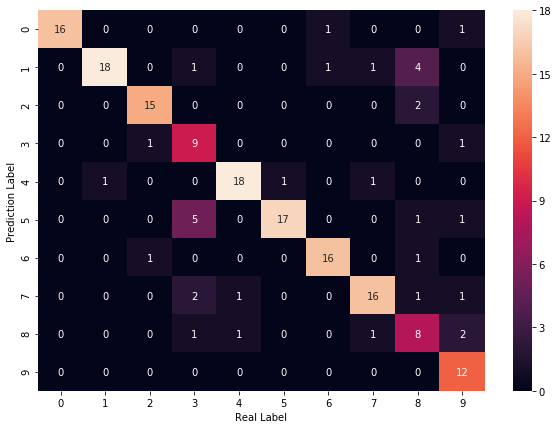

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:8 index:[5] real:5
#1 min_error:13 index:[2] real:2
#2 min_error:14 index:[1 7] real:8
#3 min_error:3 index:[0] real:0
#4 min_error:7 index:[1] real:1
#5 min_error:7 index:[7] real:7
#6 min_error:7 index:[6] real:6
#7 min_error:12 index:[3] real:3
#8 min_error:4 index:[2] real:2
#9 min_error:8 index:[1] real:1
#10 min_error:11 index:[7] real:7
#11 min_error:14 index:[7 8] real:4
#12 min_error:6 index:[6] real:6
#13 min_error:11 index:[3] real:3
#14 min_error:7 index:[1] real:1
#15 min_error:15 index:[1] real:3
#16 min_error:12 index:[7 8 9] real:9
#17 min_error:8 index:[1] real:1
#18 min_error:7 index:[7] real:7
#19 min_error:1 index:[6] real:6
#20 min_error:13 index:[8] real:8
#21 min_error:4 index:[4] real:4
#22 min_error:11 index:[3] real:3
#23 min_error:9 index:[1] real:1
#24 min_error:4 index:[4] real:4
#25 min_error:4 index:[0] real:0
#26 min_error:6 index:[5] real:5
#27 min_error:9 index:[3] real:3
#28 min_error:14 index:[6] real:6
#29 min_error:11 index:[3] real:9


In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8658008658008658
Avg Base Learner:0.8329279186422044


In [16]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.11666666666666667
Accuracy on training set: 0.15555555555555556
Accuracy on training set: 0.21666666666666667
Accuracy on training set: 0.3111111111111111
Accuracy on training set: 0.29444444444444445
Accuracy on training set: 0.37222222222222223
Accuracy on training set: 0.5444444444444444
Accuracy on training set: 0.5611111111111111
Accuracy on training set: 0.6166666666666667
Accuracy on training set: 0.6277777777777778
Accuracy on training set: 0.6777777777777778
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.6444444444444445
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6722222222222223
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6722222222222223
Accuracy on training set: 0.6277777777777778
Accuracy on training set: 0.6555555555555556
Accuracy on training set: 0.6666666666666666
Accur

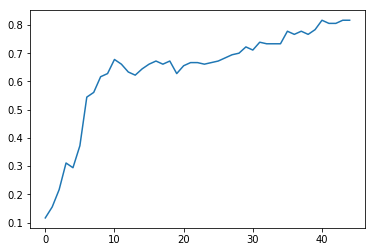

In [17]:
plt.plot(range(45),list_acc)
plt.show()

In [18]:
list_acc

[0.11666666666666667,
 0.15555555555555556,
 0.21666666666666667,
 0.3111111111111111,
 0.29444444444444445,
 0.37222222222222223,
 0.5444444444444444,
 0.5611111111111111,
 0.6166666666666667,
 0.6277777777777778,
 0.6777777777777778,
 0.6611111111111111,
 0.6333333333333333,
 0.6222222222222222,
 0.6444444444444445,
 0.6611111111111111,
 0.6722222222222223,
 0.6611111111111111,
 0.6722222222222223,
 0.6277777777777778,
 0.6555555555555556,
 0.6666666666666666,
 0.6666666666666666,
 0.6611111111111111,
 0.6666666666666666,
 0.6722222222222223,
 0.6833333333333333,
 0.6944444444444444,
 0.7,
 0.7222222222222222,
 0.7111111111111111,
 0.7388888888888889,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7777777777777778,
 0.7666666666666667,
 0.7777777777777778,
 0.7666666666666667,
 0.7833333333333333,
 0.8166666666666667,
 0.8055555555555556,
 0.8055555555555556,
 0.8166666666666667,
 0.8166666666666667]